In [52]:
data <- read.table('4.txt', header = FALSE)
X = data[1:length(data)-1]
Y = data[length(data)]

Для тестирования выберем следующие 3 набора фичей:

V6 + V7 + V1 + V2 + V4

V3 + V1 + V8 + V4

V3 + V9 + V12 + V4

In [89]:
Y = data[,length(data)]

In [90]:
model = lm(formula = V14 ~ V6 + V7 + V1 + V2 + V4, data=data)
Y_hat = predict(model)
RSS = sum((Y_hat - Y) ^ 2)
TSS = sum((Y - mean(Y)) ^ 2)
R2 = 1 - RSS / TSS
epsilon_1 = Y - Y_hat
print(R2)

[1] 0.5814153


In [91]:
model = lm(formula = V14 ~ V3 + V1 + V8 + V4, data=data)
Y_hat = predict(model)
RSS = sum((Y_hat - Y) ^ 2)
TSS = sum((Y - mean(Y)) ^ 2)
epsilon_2 = Y - Y_hat
R2 = 1 - RSS / TSS
print(R2)

[1] 0.3346821


In [92]:
model = lm(formula = V14 ~ V3 + V9 + V12 + V4, data=data)
Y_hat = predict(model)
RSS = sum((Y_hat - Y) ^ 2)
TSS = sum((Y - mean(Y)) ^ 2)
epsilon_3 = Y - Y_hat
R2 = 1 - RSS / TSS
print(R2)

[1] 0.3046897


Для разных моделий получили разные значения $R^2$. Проверим, нормально ли распределены ошибки в каждой модели.

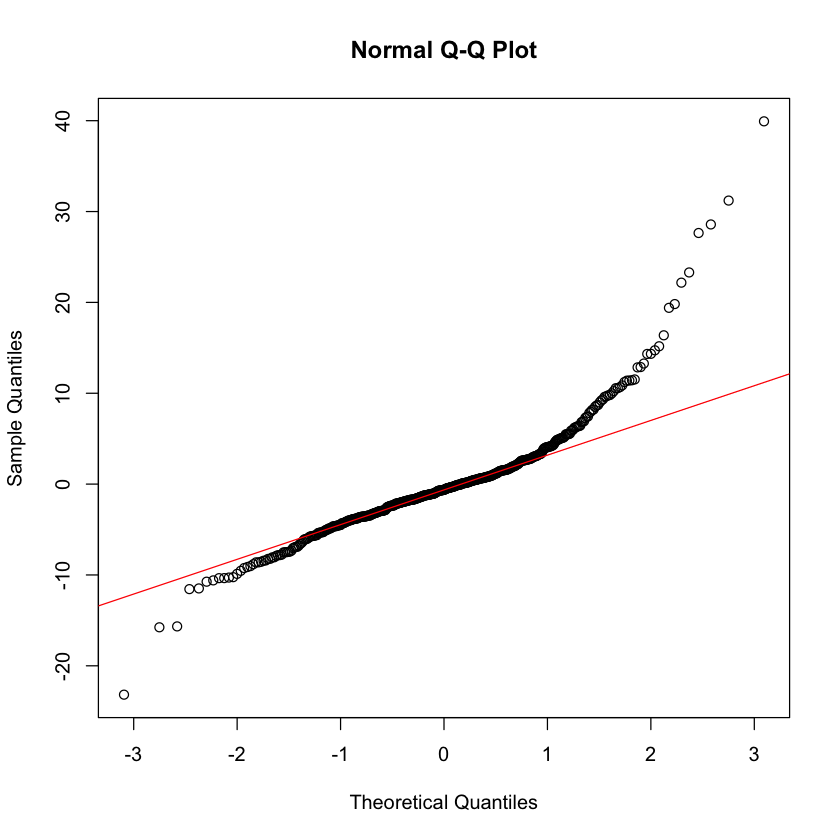

In [93]:
qqnorm(epsilon_1)
qqline(epsilon_1, col = 2)

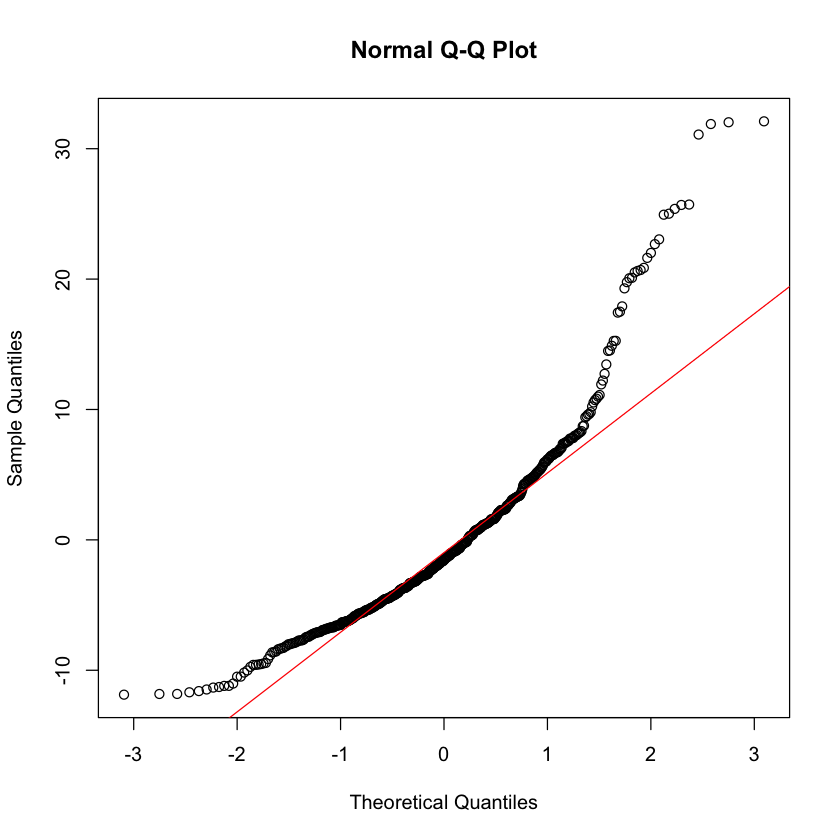

In [94]:
qqnorm(epsilon_2)
qqline(epsilon_2, col = 2)

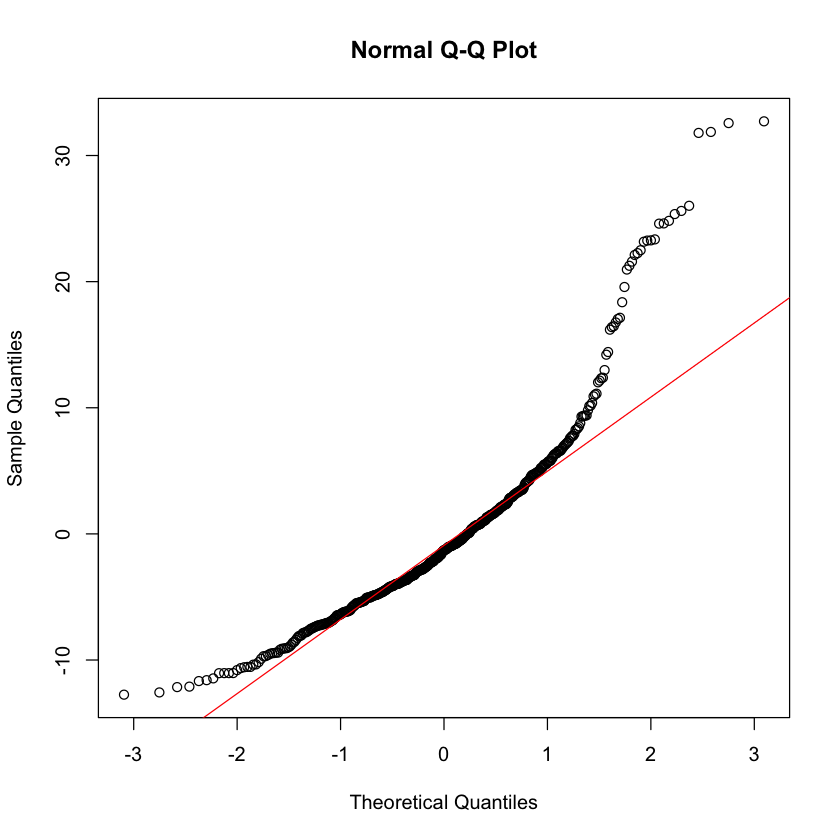

In [95]:
qqnorm(epsilon_3)
qqline(epsilon_3, col = 2)

По QQPlot видно, что ошбки не нормальны. Но проверить критерий, совсем не сложно, так что сделаем это.

In [96]:
shapiro.test(epsilon_1)


	Shapiro-Wilk normality test

data:  epsilon_1
W = 0.87931, p-value < 2.2e-16


In [97]:
shapiro.test(epsilon_2)


	Shapiro-Wilk normality test

data:  epsilon_2
W = 0.88578, p-value < 2.2e-16


In [98]:
shapiro.test(epsilon_3)


	Shapiro-Wilk normality test

data:  epsilon_3
W = 0.88224, p-value < 2.2e-16


Как и ожидалось, p-value получились маленькие, т.е. гипотезы о нормальности ошибок можно отвергнуть.